<a href="https://colab.research.google.com/github/Ultra-lion/LinearRegressionFromScratch/blob/main/LinearRegressionFromScratch10Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import sklearn
from sklearn import  linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [42]:
#y = bias + w1x1 + ... + wnxn
def linearPredict(data, weights, bias):
  pred = np.dot(data, weights) + bias
  return pred

In [43]:
#mean squared error implementation
def mserror(predictions, targets, totalLength):
  return np.sum((targets-predictions)**2)/totalLength

In [44]:
def getGradient(Data, predictions, target):
  error = (target - predictions)
  transposedDataMat = np.transpose(Data.values)
  gradient = -2/len(Data.index) * np.dot(transposedDataMat, error)
  return gradient


In [46]:
def updateWeights(weights, gradient, learning_rate):
  return weights-learning_rate*gradient

In [45]:

def drawData(data, targets, predictions):
  pca = PCA(n_components=1)
  reduced_data = pca.fit_transform(data)
  x = reduced_data[:, 0]
  plt.figure(figsize=(8, 6))
  plt.scatter(x, targets, marker='o', c='b', alpha=0.5, label='Data Points')
  plt.plot(x, predictions, color="blue", linewidth=3)
  plt.xlabel('feature')
  plt.ylabel('target')
  plt.grid(True)
  plt.legend()
  plt.show()

6069.405384691052 6069.405384691052
---------------------------------: 0
2719.452450421888 2719.452450421888
---------------------------------: 1000
2703.2782704901547 2703.2782704901547
---------------------------------: 2000
2701.0173920758893 2701.0173920758893
---------------------------------: 3000
2699.4613949730597 2699.4613949730597
---------------------------------: 4000
2698.0587230281103 2698.0587230281103
---------------------------------: 5000
2696.753728395008 2696.753728395008
---------------------------------: 6000
2695.5320418745923 2695.5320418745923
---------------------------------: 7000
2694.3850643683154 2694.3850643683154
---------------------------------: 8000
2693.3061191709935 2693.3061191709935
---------------------------------: 9000


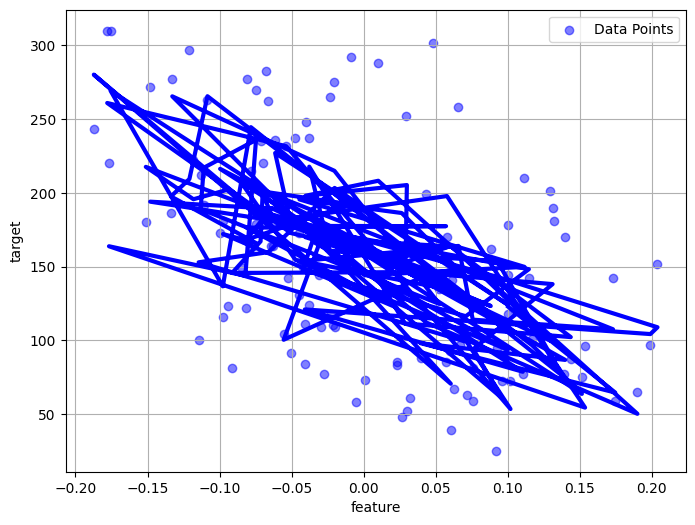

Mean squared error: 3460.32 of custom


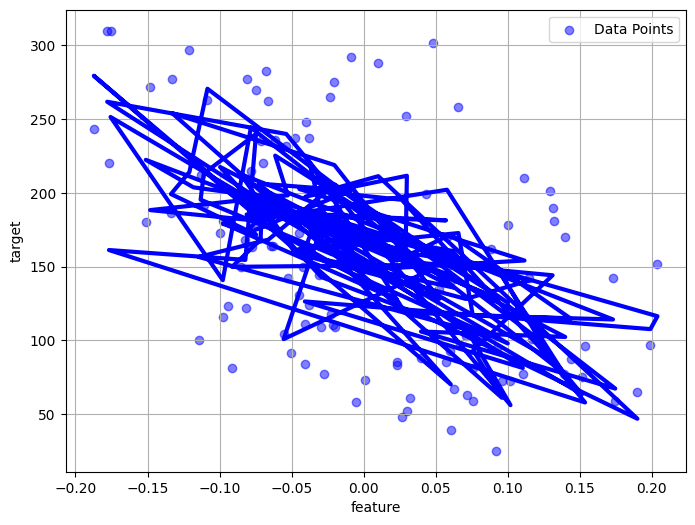

Mean squared error: 3549.43 of sklearn


In [55]:
#dataset loading
[data, output] = load_diabetes(return_X_y=True, as_frame=True, scaled=True);
#train test split
[trainData, testData, trainTargets, testTargets] = train_test_split(data, output, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

#setting hyper parameters
learning_rate = 0.5
num_epochs = 10000

#training
weights  = np.random.rand(10)
bias = sum(trainTargets)/len(trainTargets)#calculating bias
for i in range(num_epochs):
  predictions = linearPredict(trainData, weights, bias)
  mse_cstm = mserror(predictions, trainTargets, len(trainData.index))
  mse = mean_squared_error(trainTargets, predictions)
  gradient = getGradient(trainData, predictions, trainTargets)
  weights = updateWeights(weights, gradient, learning_rate)
  if(i%1000 == 0 ):
    if(i%100==0 and learning_rate>0.001):
      learning_rate -= 0.01
    print(mse_cstm, mse)
    print('---------------------------------: '+ str(i))





#testing and comparison
custom_preds = linearPredict(testData, weights, bias)
drawData(testData, testTargets, custom_preds)
print("Mean squared error: %.2f of custom with test data" % mean_squared_error(testTargets, custom_preds))



regr = linear_model.LinearRegression()
regr.fit(trainData, trainTargets)#training
sklearn_preds = regr.predict(testData)#prediction
drawData(testData, testTargets, sklearn_preds)
print("Mean squared error: %.2f of sklearn with test data" % mean_squared_error(testTargets, sklearn_preds))